In [1]:
#만약 sklearn이 없을 시, 터미널 설치
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


# 머신러닝의 기초 - 수치해석

## 03-1 선형 회귀에 대해 알아보고 데이터 준비

### 당뇨병 환자의 데이터세트 로드하기

In [2]:
#scikit에서 인공지능 학습용 데이터인, load_diabets datasets를 가져옵니다. 
from sklearn.datasets import load_diabetes
#diabetes에 load_diabets(당뇨병) 데이터가 저장됩니다.
diabetes = load_diabetes()

### 입력과 타겟 데이터의 크기 확인하기

In [3]:
type(diabetes)

sklearn.utils._bunch.Bunch


`diabetes`는 bunch 클래스입니다. 예제를 위한, 특별한 클래스입니다.
1. data속성 & target속성 : 필요한 입력과 타깃 데이터가 넘파이 배열로 저장되어 있음.
2. 넘파이 배열의 크기는 shape속성에 저장되어 있습니다. 

In [4]:
diabetes.data.shape, diabetes.target.shape

((442, 10), (442,))

`data`는 442 x 10 크기의 2차원 배열 (442개 행(columns), 10개 열(rows)). 

`target`은 442 x 1의 1차원 배열 (442 columns, 1 row).

columns = sample , rows = feature (특성)

Sample은 당뇨병환자의 데이터 1세트,Feature은 환자의 혈압, 혈당, 몸무게, 키 등 특징.
|키 | 몸무게 | 혈압 | 혈당 |
|---|------|-----|-----|
|180 | 89  | 120 | 30  | 

입력데이터는 특성, 속성, Independent variable, explainatory variable 등으로 부릅니다.

### 입력 데이터 자세히 보기

In [5]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

diabets.data의 입력데이터 중 3sample만 출력합니다. 
1. [0:3] = 0~2까지입니다.
2. [ numbers ]은 샘플입니다.
3. 0.0~~~은 i번째 특성값입니다.
4. 3 x 10의 크기 배열입니다.

### 타깃 데이터 자세히 보기

In [6]:
diabetes.target[:3]

array([151.,  75., 141.])

배열의 첫번째 요소부터 추출한다면 첫번째 인덱스는 생략 가능

`target` 데이터는 10개의 요소로 구성된 데이터 샘플 1개에 대응 됨

예  : [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
  
샘플 1개는 타깃데이터(151.)과 대응 됨.

- 입력데이터와 타깃 데이터의 수치가 무엇을 의미하는 바는 전문가(의사)의 영역.
- 두 데이터의 수치만 보고 규칙모델을 찾으세요.
- 실전에서는 data와 target의미를 아는 것은 매우 중요함
- 실무에서는 데이터 준비에 많은 공을 들임


### 시각화, matplot의 scatte() 함수로 산점도 그리기

dataset에는 10개의 feature(rows)가 있습니다.

참조 : `data`는 442 x 10 크기의 2차원 배열 (442개 행(columns), 10개 열(rows)). 

10개의 row를 표현하기 위해서는 3차원 이상의 그래프를 그려합니다.

가능하지 않으므로, 1개의 feature(row)를 사용하여 2차원그래프로 표현합니다.

즉, 1개의 feature(row)와 target으로 산점도를 그렸습니다.
 

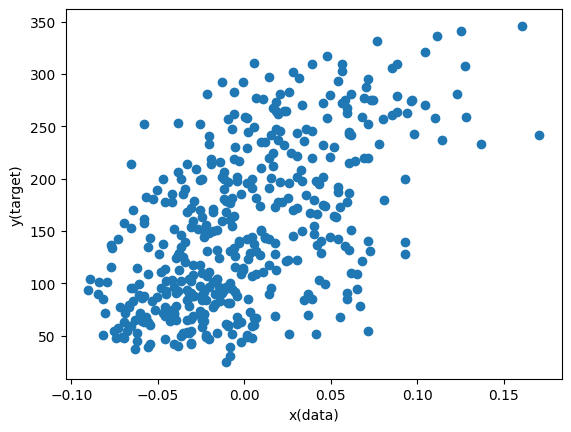

In [7]:
import matplotlib.pyplot as plt
#3번째 특성 feture(row)만 x로 사용합니다. (0,1,2)
x = diabetes.data[:, 2]
y = diabetes.target
#scatter plot(산점도)를 그리기 위해 scatter를 사용합니다.
plt.scatter(x, y)
plt.xlabel('x(data)')
plt.ylabel('y(target)')
plt.show()


* x축은 diabetes의 세번째 특성 
* y축은 diabetes.target
그래프를 보면 세 번째 특성(feature, 입력데이터)와 타깃 데이터 사이에 정비례 관계가 있음

### 훈련 데이터 준비

`diabets.data`에서
1. 세번째 특성(입력 데이터)를 미리 분리 후, 변수 x에 저장
2. 타깃 데이터는 변수 y에 저장

In [8]:
x = diabetes.data[:,2]
y = diabetes.target

## 03-2 경사 하강법으로 학습

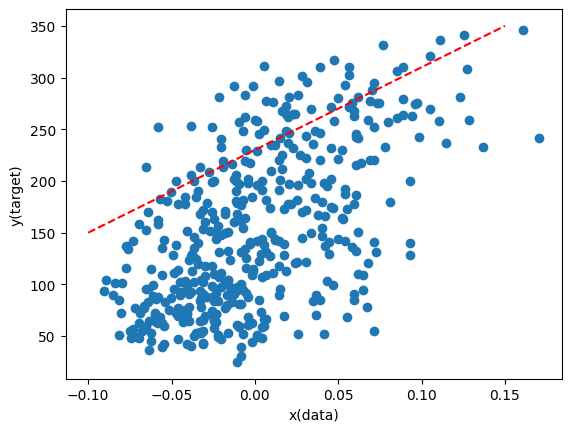

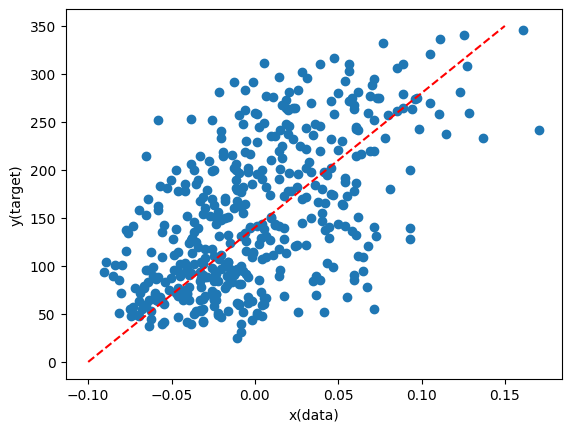

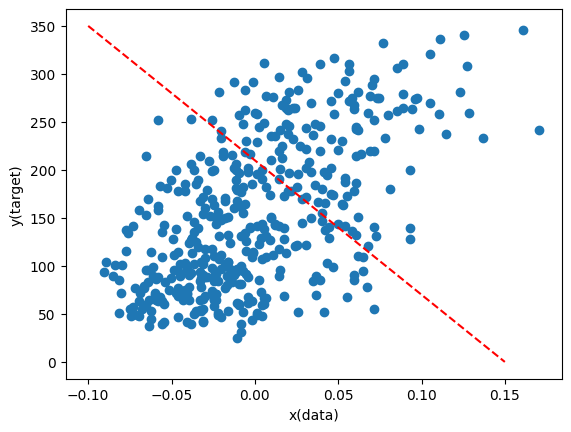

In [9]:
#scikit에서 인공지능 학습용 데이터인, load_diabets datasets를 가져옵니다. 
from sklearn.datasets import load_diabetes
#diabetes에 load_diabets(당뇨병) 데이터가 저장됩니다.
diabetes = load_diabetes()

import matplotlib.pyplot as plt
#3번째 특성 feture(row)만 x로 사용합니다. (0,1,2)
x = diabetes.data[:, 2]
y = diabetes.target
#산점도를 추가합니다.
plt.scatter(x, y)
# y=1.5의 직선을 추가합니다.
plt.plot([-0.10, 0.15], [150, 350], color='red', linestyle='--')
plt.xlabel('x(data)')
plt.ylabel('y(target)')
plt.show()

#2번 그래프
plt.scatter(x, y)
plt.plot([-0.10, 0.15], [0, 350], color='red', linestyle='--')
plt.xlabel('x(data)')
plt.ylabel('y(target)')
plt.show()

#3번그래프
plt.scatter(x, y)
plt.plot([-0.10, 0.15], [350,0], color='red', linestyle='--')
plt.xlabel('x(data)')
plt.ylabel('y(target)')
plt.show()

가운데 그래프의 직선이 다른 두 직선보다 데이터를 잘 표현하고 있습니다. 즉, 데이터를 표현하는 점들의 가운데 지점을 가로지르는 직선을 자연스럽게 찾아낼 수 있음. 

위 그래프는 입력 데이터 1개의 특성에 대한 타깃 데이터를 그래프로 표시한 것임. 만약 10개의 특성으로 그래프를 그린다면 11차원 공간을 가로지르는 hyperplane을 제작해야합니다. 그래서 보통은 특성 개수 1,2개만 사용하여 2차원,3차원 그래프를 그립니다. 낮은 차원에서 얻는 직관은 높은 차원으로 확장할 수 있습니다.


### 경사하강법이란?
선형 회귀의 목표는 입력데이터(x)와 타깃데이터(y)를 통해 기울기(a)와 절편(b)를 찾는 것이였습니다. y=ax+b 

경사 하강법(gradient descent)는 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)을 사용하여 모델을 조금씩 조정하는 최적화 알고리즘 ŷ=wx+b
- 기울기 a를  가중치를 의미하는 w나 계수를 의미하는 Θ로 표기합니다.
- y는 ŷ로 표기하며 읽을 땐 y-hat으로 읽습니다.
- 즉, y=ax+b를 ŷ=wx+b 로 사용함

### 예측값이란?
예측값(prediction)은 입력x,출력y (x,y)를 통해 규칙(a,b)의 모델을 만듦. 새 입력값을 넣을 때 나올 출력값을 예측한 값.
- 예 : y = 5x + 5 모델에 x=5를 넣으면 30의 값을 예측함.
- 타깃데이터 y와 구분하기 위해 ŷ을 사용. y와 ŷ은 어떤 결과입니다.

## prediction으로 올바른 모델 찾기
##### 훈련데이터(x,y)에 잘 맞는 w, b를 찾기 위한 방법
 1. 무작위로 w와 b를 정하기.(무작위 모델 제작)
 2. x에서 샘플 하나를 선택하여 ŷ를 계산하기(무작위 모델 예측)
 3. ŷ와 선택한 샘플 real y를 비교 (예측한 값과 진짜 정답비교, 틀릴 확률 99%)
 4. ŷ가 y와 가까워지도록 w, b를 조정 (모델 조정)
 5. 모든 샘플을 처리할 때까지 2~4번 반복
 
Tip : 미분과 비슷한 방식

`4.  ŷ가 y와 가까워지도록 w와 b를 조정하는 방법`은 단순한 모델에서는 w와 b의 부호를 보고 ŷ가 커지거나 작아지는 방향을 짐작하기 쉽습니다. 하지만, 모델이 복잡하면 체계적인 방법을 사용해야 함.

### 체계적인 w와 b를 조정하기
#### 훈련데이터에 맞는 w와 b찾아보기
w와 b가 바뀌었을 때 ŷ의 변화를 알아내는 가장 간단한 방법 : 실제로 계산해보기

#### 1. w와 b 초기화하기
w와 b를 무작위로 초기화합니다. 예시로 w,b를 실수 1.0으로 정합니다. 예제를 위해 1.0으로 지정한 것일 뿐

In [10]:
w = 1.0
b = 1.0

#### 2. 훈련 데이터의 첫 번째 샘플 데이터로 ŷ 얻기
훈련 데이터의 첫 번째 샘플 x[0]에 대한 ŷ 계산. 계산한 값 ŷ은 y_hat 변수에 저장

In [11]:
y_hat = x[0] * w + b
y_hat 

1.0616962065186832

#### 3. 타깃과 예측 데이터 비교하기
첫 번쩨 샘플 x[0]에 대응하는 target 값 y[0]을 출력 후 y_hat과 비교함.

In [12]:
y[0]

151.0

#### 4. w 값 조절하여 prediction 바꾸기
예측한 y_hat은 1.06 정도입니다. 타깃은 151.0으로 차이가 큽니다. w와 b를 무작위 값으로 정하여 예측결과가 잘 나오지 않았습니다. w와 b를 변경하여 y_hat이 y[0]에 가까워지게 합니다. w와 b를 변경하여 y_hat이 증가 또는 감소하는 지 확인합니다.
w를 0.1만큼 증가시키고 y_hat 변화량을 확인합니다.

In [13]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
y_hat_inc

1.0678658271705517

w값을 0.1 만큼 증가시킨 뒤, 값을 예측하여 y_hat_inc에 저장했습니다. y_hat이 조금 증가했습니다.

#### 5. w 값 조정 후 prediction value 증가 정도 확인하기
w가 0.1만큼 증가했을 때, y_hat이 증가한 값을 계산합니다. y_hat이 증가한 양을 w가 증가한 양으로 나눕니다.

In [14]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

0.0616...은 첫 번째 훈련 데이터 x[0]에 대한 w 변화율임. w_rate의 코드를 수식으로 정리합니다. 변화율은 훈련 데이터의 첫 번째 샘플 x[0]임을 알 수 있습니다.

$w_{rate} = {y_{hat-inc} - y_{hat}  \over w_{inc}-w} = {(x[0] * w_{inc} + b) - (x[0] * w + b) \over w_{inc} - w} = {x[0] * ((w+0.1)-w) \over (w+0.1)-w}=x[0]$

정리 : y_hat의 값은 y보다 작음. y_hat의 값을 증가시켜야 함. 변화율은 양수이므로 w값을 증가시켜 y_hat 값을 증가 시킴. 만약 변화율이 음수일 때 y_hat 값을 증가시켜야 하면 w값을 감소시키면 됨. 하지만, 이 방법은 변화율이 양수,음수를 구분해야 함. 다음 내용은 효율적으로 해결하는 방법은 변화율 자체를 설명합니다. 

## 변화율로 가중치 업데이트하기
선형회긔(linear regression)의 목표 : y에 가까운 ŷ를 잘 예측하는 모델 w,b를 찾아내는 것

**변화율이 양수일 때 가중치를 업데이트 하는 방법**

변화율이 0보다 큰 경우 그래프

![nn](img/03_02-1.png)

앞 예제에서 ŷ 값은 y에 한참 모자랐습니다. ŷ이 증가해야합니다.
w가 증가하면 ŷ도 증가합니다.
변화율이 양수입니다. 변화율(w_rate)에 w를 더하여 w를 증가시킬 수 있습니다.

**변화율이 음수일 때 가중치를 업데이트 하는 방법**

변화율이 0보다 작을 경우 그래프

![nn](img/03_02-02.png)

w가 증가하면 ŷ는 감소합니다. w가 감소하면 ŷ는 증가합니다. 변화율(w_rate)에 w를 더하면 w가 감소합니다.
변화율 양수 음수 모두 변화율에 w를 더하면 됩니다. 두경우 모두 w + w_rate 입니다.

In [15]:
w_new = w + w_rate
w_new

1.0616962065186843

### 변화율(rate)로 절편(gradient) 업데이트하기
절편 b에 대한 변화율을 구한 뒤 변화율 b를 업데이트합니다. b를 0.1만큼 증가 후 ŷ의 변화율을 확인

In [18]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc, y_hat)

1.1616962065186833 1.0616962065186832


In [17]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

b_rate(b의 변화율)의 값은 1. b가 1 증가하면 ŷ깂은 0.1 증가하였음. 그래프를 그려보면, 절편이 1만큼 증가하면 y방향으로 1만큼 올라갑니다.

$ b_{rate} = {y_{hat-inc}-y_{hat} \over b_{inc} - b} = {(x[0]*w + b_{inc})-(x[0]*w+b) \over b_{inc}-b} = {(b+0.1)-b \over (b+0.1)-b} = 1 $

b를 업데이트하기 위해 변화율이 1이므로 간단히 1을 더합니다.

In [19]:
b_new = b + 1
b_new

2.0

위 실습에서 ŷ를 증가시켜야 하는 상황을 가정하였습니다. w,b를 업데이트하는 방법을 알아보았습니다. 하지만 수동적인 방법이였습니다. 이유는 두 상황에 대해 적합한 대처를 못하기 때문입니다.
- ŷ이 y에 한참 미치지 못 하는 값인 경우, w,b를 더 큰 폭으로 수정할 수 없습니다. (변화율만큼 수정을 했지만 특정한 기준을 정하기 어렵습니다.)
- ŷ이 y보다 커지면 ŷ를 감소시키지 못 합니다.

w와 b를 능동적으로 업데이트하는 방법인 오차 역전파에 대해 알아봅니다.

## 오차 역전파(backpropagation)로 가중치(weight)와 절편(gradient)를 더 적절히 업데이트하기

오차 역전파란 ŷ와 y의 차이를 이용 -> w,b를 업데이트. 오차가 연이어 전파되는 모습으로 수행. 예제는 단순하여 전파되는 모습이 잘 보이지 않습니다.

#### 가중치와 절편을 적절하게 업데이트하기

앞의 예제는 변화율만으로 w,b를 업데이트하였음. 만약 ŷ와 y의 차이가 크면 어떻게 하나요? w,b를 더 증가시키나요? ŷ가 y보다 크면 ŷ를 감소시켜야 합니다. w,b를 감소시키나요?

이번 예제는 y에서 ŷ을 뺀 오차의 양을 변화율에 곱하는 방법으로 w를 업데이트합니다. ŷ가 y보다 많이 작은 경우 w,b를 많이 바꿀 수 있음. ŷ이 y를 지나치면 w,b 방향을 바꿔줍니다.

#### 1. 오차와 변화율을 곱하여 가중치 업데이트
x[0]일 때, w rate와 b rate에 오차를 곱합니다. 업데이트 된 변수는 w_new, b_new입니다.

In [20]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


#### 2. 두 번째 샘플 x[1]을 사용하여 오차와 새로운 w,b구하기
앞 예제에서 w_rate 식을 정리하면 샘플값과 같아진다는 것을 증명했습니다. w_rate는 샘플값 그대로 사용합니다. 즉, 이번 코드에선 x[1]이 w_rate가 됩니다.

In [21]:
y_hat = x[1] * w_new + b_new #y = wx + b
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new  + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


w는 4만큼 커지고 b는 절반(150에서 75로) 줄어들었습니다. 모든 샘플을 사용해 가중치와 절편을 업데이트합니다.

#### 3. 전체 샘플 반복하기

In [22]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


파이썬의 zip() 함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼냅니다. 입력 x와 타겟 y배열에서 하나씩 꺼내어 err를 계산함. w,b를 업데이트 하였음. for문을 사용하여 변수명이 달라졌을 뿐, 같은 코드임.

#### 4.과정3번 모델이 전체 데이터 세트를 잘 표현하는 지 그래프를 그려봅니다.
산점도 위에 w,b를 사용한 직선을 그리면 알 수 있음. 직선그래프를 그리기 위해 시작점,종료점의 x,y좌표를 plot() 함수에 전달하면 됨. x좌표 [-0.1, 0.15]를 지정하고 y좌표값은 w,b를 이용해 계산하면 그릴 수 있음.

<function matplotlib.pyplot.show(close=None, block=None)>

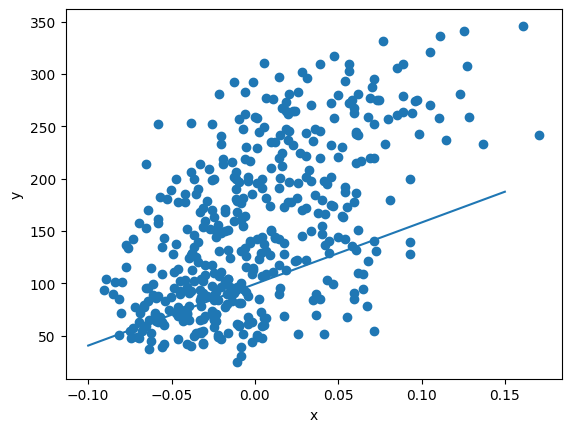

In [23]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show

직선의 모양은 만족스럽진 않지만 어느정도 표현했습니다. 조금 더 괜찮은 직선을 구하기 위해 반복합니다.


#### 5. 여러 에포크 반복하기
보통 경사 하강법(gradient descent)에서는 훈련데이터로 학습을 여러번 반복합니다. 전체 데이터를 모두 이용하여 한 단위의 작업은 에포크(epoch)임. 일반적으로 수십,수천번 에포크를 반복함. 100번을 반복하여 직선을 이동을 관찰. for문 바깥에 for을 씌우면 됨.

In [24]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w,b)

913.5973364346786 123.39414383177173


100번의 에포크를 반복하여 찾은 w,b는 약 913.6, 123.4 정도임. w,b를 이용하여 직선을 그래프로 나타내었습니다.

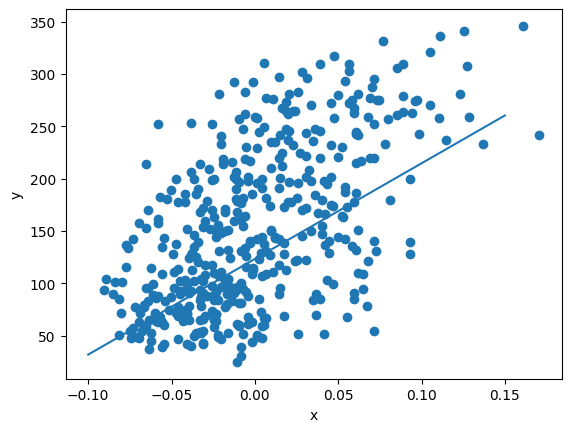

In [26]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

직선이 전체 데이터의 경향을 괜찮게 따라갑니다.

`ŷ = 913.6x + 123.4`

#### 모델로 예측하기
입력 x에 없던 새 데이터를 발생했다 가정. 예측값을 얻기 위해, 모델에 x를 넣고 계산하면 됨. ex ) x가 0.18일 때 ŷ의 값 예측

In [27]:
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643900139

데이터를 산점도 위에 나타내면

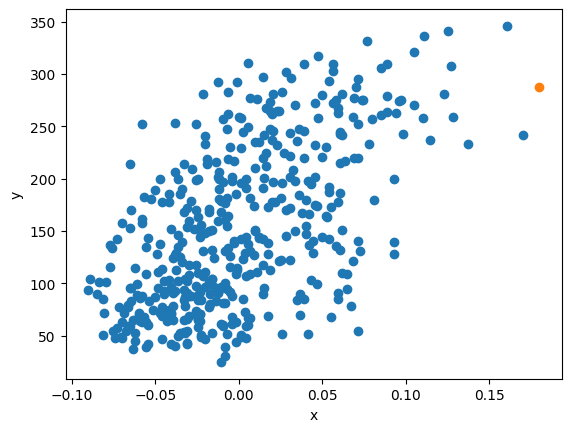

In [28]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

오랜지 색 점이 x가 0.18일 때 예측한 ŷ입니다.
어느정도 추세를 따라갑니다. 머신러닝 모델로 예측까지 수행하였음.

*모델 제작 실습 요약*
1. w,b를 임의의 값(1.0, 1.0)으로 초기화. 훈련 데이터의 샘플을 하나씩 대입. y와 ŷ의 오차 구하기.
2. 과정1에서 구한 오차를 w,b의 변화율에 곱함. 값을 w,b로 업데이트
3. ŷ이 y보다 크면 오차는 음수. w,b가 줄어드는 방향으로 업데이트.
4. ŷ가 y보다 작으면 오차는 양수. w,b는 더 커지도록 업데이트.

기억해야할 부분 : 
1. 경사 하강법으로 선형 회귀의 가중치와 절편찾기. 
2. 오차 역전파는 모델을 업데이트할 때 오차의 크기를 반영함.